## Ejercicio # 1 
Leer la sección 9.4 sobre el operador Hit or Miss. Explicar con sus propias palabras cómo funciona este operador, y cómo se
construye la operación A ∗ B a partir de las operaciones básicas de dilatación, erosión, opening, closing y diferencia.
Mostrar un ejemplo con una imagen binaria de su elección en donde se muestre que el operador Hit or Miss detecta la
localización de un (o varios) objetos especí
ficos dentro de una imagen binaria I.

R// 
El operador Hit or Miss es una herramienta fundamental en el procesamiento de imágenes, especialmente en el ámbito de la morfología matemática, que se utiliza para la detección de patrones específicos dentro de una imagen binaria. Funciona basándose en dos elementos estructurantes: uno que debe encajar con el objeto de interés (hit) y otro que debe encajar con el fondo (miss).

La operación A∗B, donde A es la imagen binaria y B es un elemento estructurante compuesto por una parte de hit y una parte de miss, se construye utilizando las operaciones básicas de morfología matemática de la siguiente manera:

Erosión: Se erosiona la imagen A con la parte de hit del elemento estructurante B. Esto se hace para encontrar las regiones de la imagen donde el elemento estructurante encaja completamente.

Complemento y Erosión: Se toma el complemento de la imagen A (es decir, se invierten los píxeles blancos y negros) y se erosiona con la parte de miss del elemento estructurante B. Esto se hace para encontrar las regiones del fondo que encajan con la parte de miss.

Intersección: Finalmente, se realiza la intersección (AND lógico) de los resultados de las dos erosiones anteriores. Esto da como resultado las posiciones exactas donde el patrón definido por el elemento estructurante B (tanto la parte de hit como la parte de miss) se encuentra en la imagen A. Esencialmente, esta operación permite detectar formas específicas en una imagen, teniendo en cuenta no solo donde debe aparecer el objeto de interés (hit) sino también donde debe estar el fondo (miss).

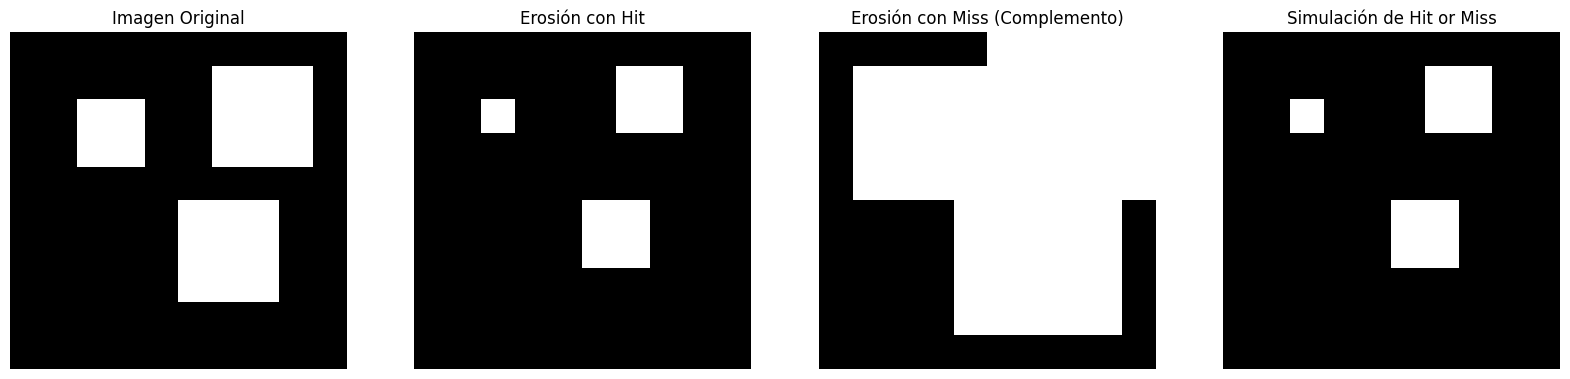

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import erosion, square

# Re-crear la imagen binaria y elementos estructurantes necesarios
image = np.zeros((10, 10), dtype=np.uint8)
image[2:4, 2:4] = 1  # Añadir un cuadrado pequeño
image[5:8, 5:8] = 1  # Añadir un cuadrado más grande
image[1:4, 6:9] = 1  # Añadir otro objeto para complejidad

# Elemento estructurante para el hit
selem_hit = np.array([[1, 1], [1, 1]])  # Parte de hit: cuadrado de 2x2

# Realizar las operaciones de erosión manualmente
erosion_hit = erosion(image, selem_hit)
complement_image = 1 - image  # Complemento de la imagen
erosion_miss = erosion(complement_image, square(3))  # Erosión con el complemento y un elemento estructurante apropiado

# Simulación manual de Hit or Miss
hit_or_miss_manual = erosion_hit & (1 - erosion_miss)

# Mostrar la imagen original y el resultado de la simulación manual de Hit or Miss
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(erosion_hit, cmap='gray')
axes[1].set_title('Erosión con Hit')
axes[1].axis('off')

axes[2].imshow(1 - erosion_miss, cmap='gray')
axes[2].set_title('Erosión con Miss (Complemento)')
axes[2].axis('off')

axes[3].imshow(hit_or_miss_manual, cmap='gray')
axes[3].set_title('Simulación de Hit or Miss')
axes[3].axis('off')

plt.show()


